In [2]:
import pandas as pd

file_path = "Salt.xls"
salt_data = pd.read_excel(file_path, header=None)

salt_data = salt_data.iloc[1:]

salt_data.columns = ["Год", "Месяц", "Индексы"]

salt_data["Год"] = salt_data["Год"].fillna(method="ffill")

print(salt_data.to_string())


        Год       Месяц Индексы
1    2002.0      январь  101.75
2    2002.0     февраль  101.28
3    2002.0        март  101.35
4    2002.0      апрель   101.2
5    2002.0         май  101.02
6    2002.0        июнь   100.8
7    2002.0        июль  101.32
8    2002.0      август  101.71
9    2002.0    сентябрь  100.91
10   2002.0     октябрь  101.09
11   2002.0      ноябрь  101.22
12   2002.0     декабрь  100.81
13   2003.0      январь   101.6
14   2003.0     февраль  101.52
15   2003.0        март  101.43
16   2003.0      апрель  100.85
17   2003.0         май  100.76
18   2003.0        июнь  101.07
19   2003.0        июль  101.11
20   2003.0      август  101.62
21   2003.0    сентябрь  101.52
22   2003.0     октябрь  101.31
23   2003.0      ноябрь  100.78
24   2003.0     декабрь  100.53
25   2004.0      январь  100.58
26   2004.0     февраль  100.35
27   2004.0        март  100.43
28   2004.0      апрель  100.53
29   2004.0         май  100.74
30   2004.0        июнь  100.26
31   200

/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_63086/2576637184.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  salt_data["Год"] = salt_data["Год"].fillna(method="ffill")


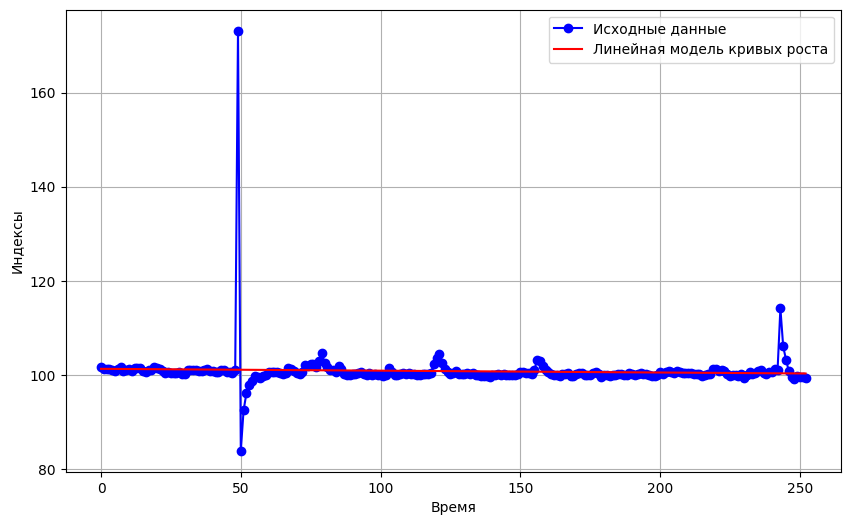

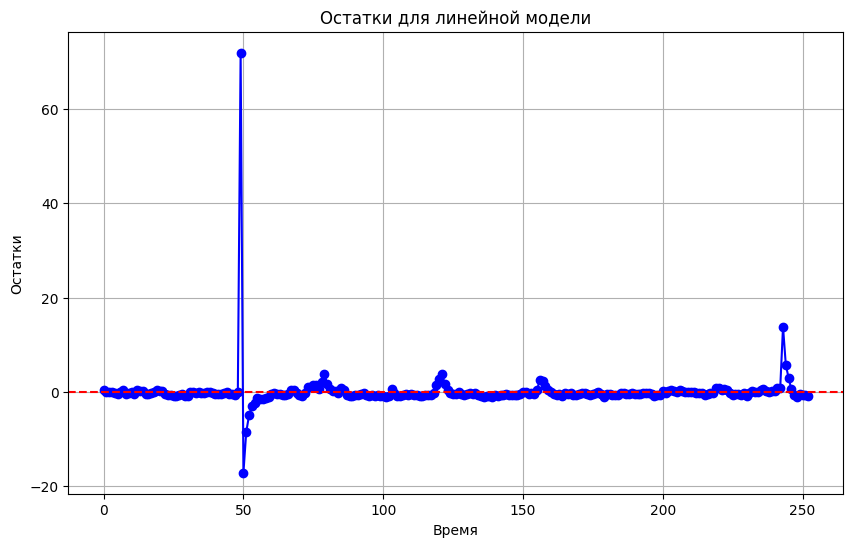

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные временного ряда
x = np.arange(len(salt_data))
y = salt_data["Индексы"].astype(float)

# Линейная модель кривых роста
def linear_curve(x, a, b):
    return a * x + b

# Оценка параметров модели
lin_params, lin_cov = curve_fit(linear_curve, x, y)

# Получение предсказанных значений
lin_y_fit = linear_curve(x, *lin_params)

# График
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo-', label='Исходные данные')
plt.plot(x, lin_y_fit, 'r-', label='Линейная модель кривых роста')
plt.xlabel('Время')
plt.ylabel('Индексы')
plt.legend()
plt.grid(True)
plt.show()
# Остатки для линейной модели
lin_residuals = y - lin_y_fit

# График остатков для линейной модели
plt.figure(figsize=(10, 6))
plt.plot(x, lin_residuals, 'bo-')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.title('Остатки для линейной модели')
plt.grid(True)
plt.show()



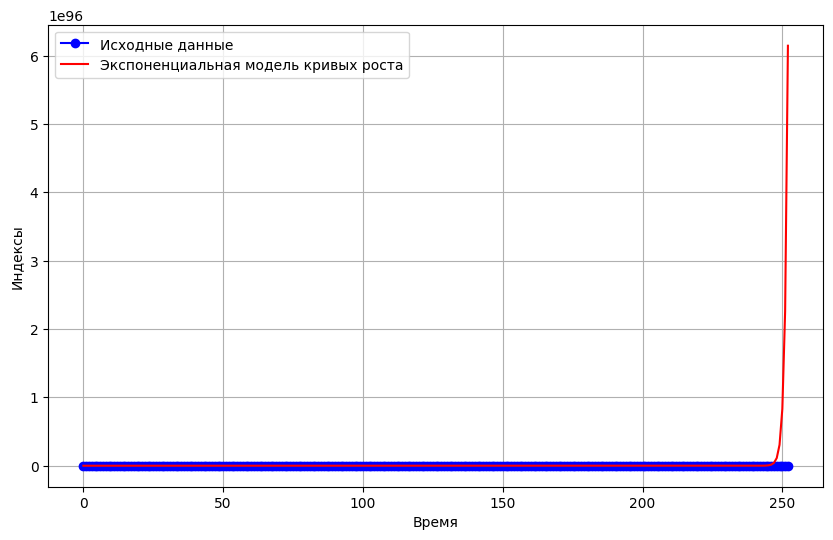

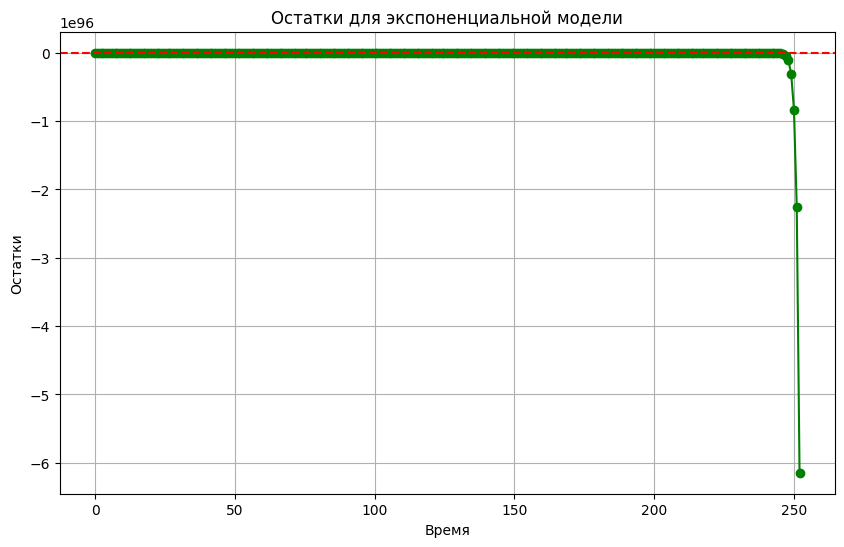

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные временного ряда
x = np.arange(len(salt_data))
y = salt_data["Индексы"].astype(float)

# Экспоненциальная модель кривых роста
def exponential_curve(x, a, b):
    return a * np.exp(b * x)

# Оценка параметров модели
exp_params, exp_cov = curve_fit(exponential_curve, x, y)

# Получение предсказанных значений
exp_y_fit = exponential_curve(x, *exp_params)

# График
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo-', label='Исходные данные')
plt.plot(x, exp_y_fit, 'r-', label='Экспоненциальная модель кривых роста')
plt.xlabel('Время')
plt.ylabel('Индексы')
plt.legend()
plt.grid(True)
plt.show()
# Остатки для экспоненциальной модели
exp_residuals = y - exp_y_fit

# График остатков для экспоненциальной модели
plt.figure(figsize=(10, 6))
plt.plot(x, exp_residuals, 'go-')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.title('Остатки для экспоненциальной модели')
plt.grid(True)
plt.show()


In [7]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import f

# Функция для оценки линейной модели
def linear_growth(t, a, b):
    return a + b * t

# Индекс наблюдения марта 2006 года
index = 230

# Данные временного ряда
y = salt_data["Индексы"].values
t = np.arange(len(y))

# Разделяем данные на две части: до и после марта 2006 года
y1 = y[:index]
t1 = t[:index]
y2 = y[index:]
t2 = t[index:]

# Оцениваем параметры линейной модели для каждой части данных
linear_params1, _ = curve_fit(linear_growth, t1, y1)
linear_params2, _ = curve_fit(linear_growth, t2, y2)

# Получаем предсказанные значения для каждой части данных
predicted_y1 = linear_growth(t1, *linear_params1)
predicted_y2 = linear_growth(t2, *linear_params2)

# Рассчитываем сумму квадратов остатков (RSS) для полной модели
rss_full = np.sum((y - np.concatenate((predicted_y1, predicted_y2))) ** 2)

# Рассчитываем сумму квадратов остатков (RSS) для ограниченной модели (до и после марта 2006 года)
rss_restr = np.sum((y1 - predicted_y1) ** 2) + np.sum((y2 - predicted_y2) ** 2)

# Вычисляем статистику Чоу
chow_statistic = ((rss_full - rss_restr) / 2) / (rss_restr / (len(y) - 4))

# Вычисляем p-значение
p_value = 1 - f.cdf(chow_statistic, 2, len(y) - 4)

# Уровень значимости
alpha = 0.05

# Выводим результаты
print("Статистика Чоу:", chow_statistic)
print("p-значение:", p_value)

# Статистическое решение
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существует структурный сдвиг в данных.")
else:
    print("Принимаем нулевую гипотезу. Структурный сдвиг в данных отсутствует.")


Статистика Чоу: 0.0
p-значение: 1.0
Принимаем нулевую гипотезу. Структурный сдвиг в данных отсутствует.


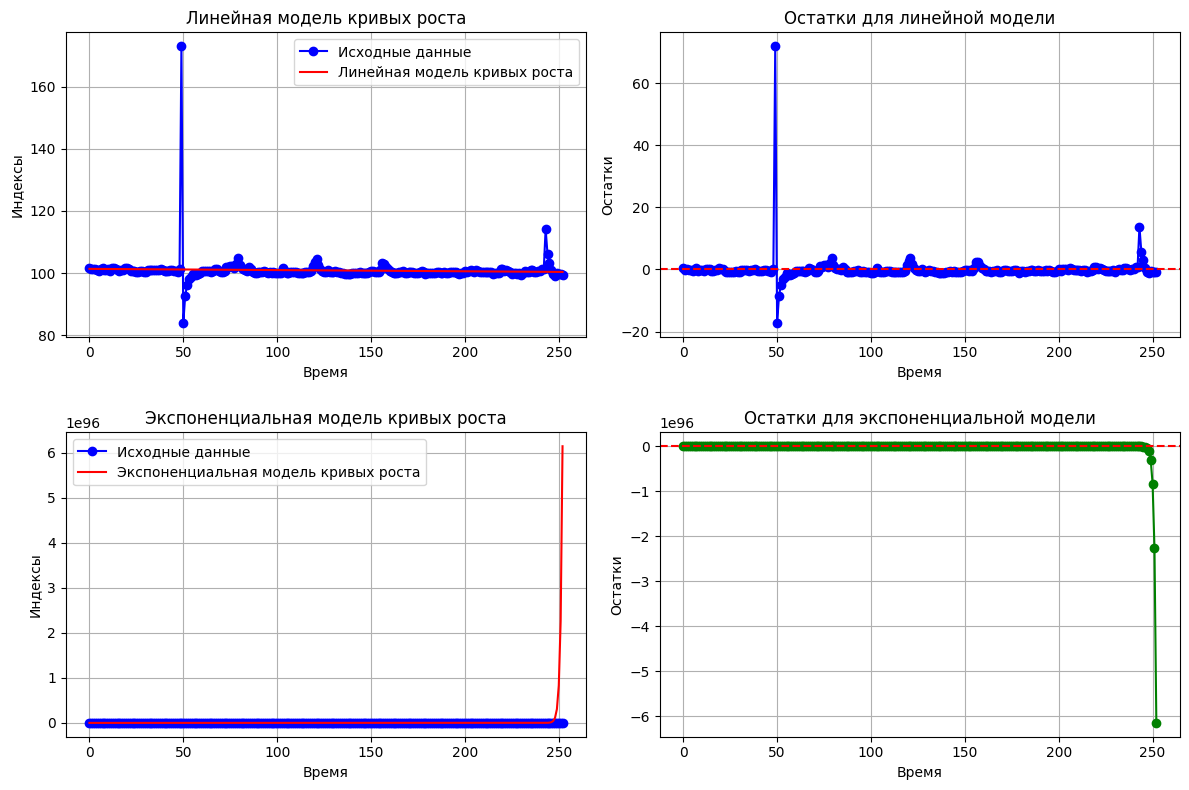

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные временного ряда
x = np.arange(len(salt_data))
y = salt_data["Индексы"].astype(float)

# Линейная модель кривых роста
def linear_curve(x, a, b):
    return a * x + b

# Оценка параметров модели
lin_params, lin_cov = curve_fit(linear_curve, x, y)

# Получение предсказанных значений
lin_y_fit = linear_curve(x, *lin_params)

# График линейной модели и исходных данных
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, y, 'bo-', label='Исходные данные')
plt.plot(x, lin_y_fit, 'r-', label='Линейная модель кривых роста')
plt.xlabel('Время')
plt.ylabel('Индексы')
plt.legend()
plt.grid(True)
plt.title('Линейная модель кривых роста')

# Остатки для линейной модели
lin_residuals = y - lin_y_fit

# График остатков для линейной модели
plt.subplot(2, 2, 2)
plt.plot(x, lin_residuals, 'bo-')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.title('Остатки для линейной модели')
plt.grid(True)

# Экспоненциальная модель кривых роста
def exponential_curve(x, a, b):
    return a * np.exp(b * x)

# Оценка параметров модели
exp_params, exp_cov = curve_fit(exponential_curve, x, y)

# Получение предсказанных значений
exp_y_fit = exponential_curve(x, *exp_params)

# График экспоненциальной модели и исходных данных
plt.subplot(2, 2, 3)
plt.plot(x, y, 'bo-', label='Исходные данные')
plt.plot(x, exp_y_fit, 'r-', label='Экспоненциальная модель кривых роста')
plt.xlabel('Время')
plt.ylabel('Индексы')
plt.legend()
plt.grid(True)
plt.title('Экспоненциальная модель кривых роста')

# Остатки для экспоненциальной модели
exp_residuals = y - exp_y_fit

# График остатков для экспоненциальной модели
plt.subplot(2, 2, 4)
plt.plot(x, exp_residuals, 'go-')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.title('Остатки для экспоненциальной модели')
plt.grid(True)

plt.tight_layout()
plt.show()
